In [1]:
import os
from placefield_dynamics.placefield_detection import *
from placefield_dynamics.placefield_detection.utils import *

from placefield_dynamics.placefield_detection.unbiased_MI.info_functions import *

2024-02-24 23:49:28.838980: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

pathSession = '../data/556wt/Session12'
pathBehavior = os.path.join(pathSession,'aligned_behavior.pkl')
pathActivity = os.path.join(pathSession,'CaImAn_complete.hdf5')

neuron = 12
ld = load_dict_from_hdf5(pathActivity)
#S = gauss_filter(ld['S'][neuron,:],5)
S = ld['S']

with open(pathBehavior,'rb') as f_open:
    ld = pickle.load(f_open)

nbin = 40
behavior = prepare_behavior(ld['time'],ld['position'],ld['reward_location'],nbin=nbin,f=15)
#activity = prepare_activity(S,behavior['active'],behavior['trials'],nbin=nbin)
active_spike = S[:,behavior['active']]
stimulus_trace = behavior['binpos']

In [3]:
sample_fraction = np.arange(0.1, 1.1, 0.1)

repetitions = 500
info_measures = [1,1,1]

dt = 1/15.
average_firing_rates = np.mean(active_spike,axis=1) / dt

In [4]:
tuning_curves, stimulus_distribution  = compute_tuning_curves(active_spike,stimulus_trace,dt)

In [5]:
SI_bit_spike, SI_bit_sec = compute_SI(average_firing_rates,tuning_curves, stimulus_distribution)

In [6]:
MI = compute_MI(active_spike,stimulus_trace)

In [7]:
N,T = active_spike.shape
sample_sizes = sample_fraction * T
sample_sizes


array([ 177.9,  355.8,  533.7,  711.6,  889.5, 1067.4, 1245.3, 1423.2,
       1601.1, 1779. ])

In [8]:

sample_sizes = sample_fraction * T

5000 * T/sample_sizes[0]

50000.0

In [17]:
[
    SI_naive_bit_spike_versus_sample_size,
    SI_shuffle_bit_spike_versus_sample_size,
    SI_naive_bit_sec_versus_sample_size,
    SI_shuffle_bit_sec_versus_sample_size,
    MI_naive_versus_sample_size,
    MI_shuffle_versus_sample_size
] = compute_info_versus_sample_size(active_spike, stimulus_trace, sample_fraction, dt, 5000, [1,1,1])

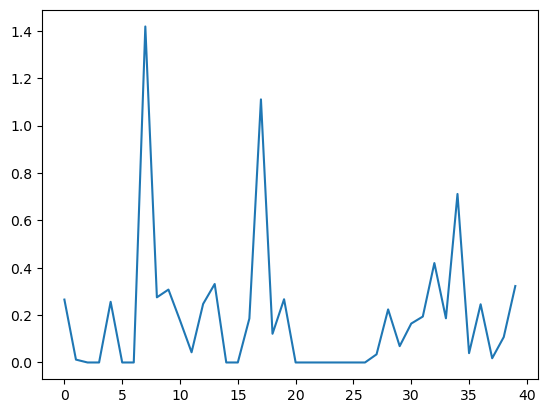

In [18]:
plt.figure()
plt.plot(tuning_curves[13,:])
plt.show()

In [11]:
SI_naive_bit_spike_versus_sample_size.shape

(579, 10)

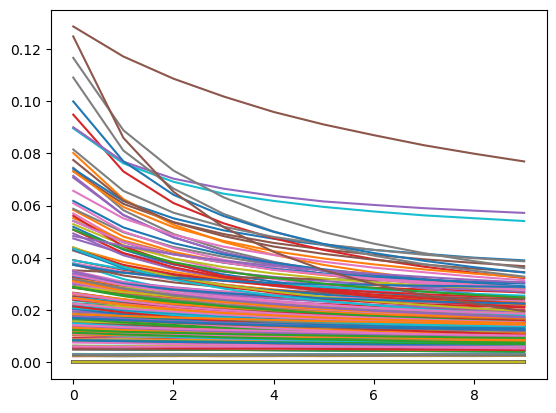

In [19]:
plt.figure()
#plt.plot(SI_naive_bit_spike_versus_sample_size.T)
plt.plot(MI_naive_versus_sample_size.T)
plt.show()

In [20]:
import pickle
res = {
    'SI_naive_spike': SI_naive_bit_spike_versus_sample_size,
    'SI_shuffle_spike': SI_shuffle_bit_spike_versus_sample_size,
    'SI_naive_sec': SI_naive_bit_sec_versus_sample_size,
    'SI_shuffle_sec': SI_shuffle_bit_sec_versus_sample_size,
    'MI_naive': MI_naive_versus_sample_size,
    'MI_shuffle':MI_shuffle_versus_sample_size
}

with open('info_vs_sample_size_results.pkl','wb') as f_open:
    pickle.dump(res, f_open)